In [3]:
# 
import json
import cv2
import requests
import uuid
from tencentcloud.common import credential
from tencentcloud.common.profile.client_profile import ClientProfile
from tencentcloud.common.profile.http_profile import HttpProfile
from tencentcloud.common.exception.tencent_cloud_sdk_exception import TencentCloudSDKException
from tencentcloud.ocr.v20181119 import ocr_client, models
from tencentcloud.ocr.v20181119 import models as ocr_models
import numpy as np
import base64
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
with open("../tencent_key.json" ,'r') as key:
    SecretDict=json.loads(key.read())
SecretId=SecretDict["SecretId"]
SecretKey=SecretDict["SecretKey"]

In [4]:
"""

通用印刷体识别（高精度版）
https://console.cloud.tencent.com/api
/explorer?Product=ocr&Version=2018-11-19&Action=GeneralAccurateOCR&SignVersion=
"""


try: 
    cred = credential.Credential(SecretId, SecretKey) 
    httpProfile = HttpProfile()
    httpProfile.endpoint = "ocr.tencentcloudapi.com"

    clientProfile = ClientProfile()
    clientProfile.httpProfile = httpProfile
    client = ocr_client.OcrClient(cred, "ap-beijing", clientProfile) 
    img_path="./images/zh1.jpg"
    with open(img_path,"rb") as file:
        img=base64.b64encode(file.read()) 
    req = ocr_models.GeneralAccurateOCRRequest()    # 通用印刷体识别（高精度版）
#     req = ocr_models.GeneralEfficientOCRRequest() # 通用印刷体识别（精简版）
#     req = models.GeneralFastOCRRequest()          # 通用印刷体识别（高速版）
#     req = models.AdvertiseOCRRequest()            # 广告文字识别




    params = {
        "ImageBase64": str(img,encoding="utf-8"),
#         "ImageUrl": "",
#         "IsWords": False
    }
    req.from_json_string(json.dumps(params))

    resp = client.GeneralAccurateOCR(req).to_json_string()     # 通用印刷体识别（高精度版）
#     resp = client.GeneralEfficientOCR(req).to_json_string()  # 通用印刷体识别（精简版）
#     resp = client.GeneralFastOCR(req).to_json_string()       # 通用印刷体识别（高速版）
#     resp = client.AdvertiseOCR(req).to_json_string()         # 广告文字识别

    resp=json.loads(resp)
    print(resp)  

except TencentCloudSDKException as err: 
    print(err) 



{'TextDetections': [{'DetectedText': '塔利班武装在社交媒体“晒战果”', 'Confidence': 99, 'Polygon': [{'X': 19, 'Y': 28}, {'X': 301, 'Y': 28}, {'X': 301, 'Y': 51}, {'X': 19, 'Y': 51}], 'AdvancedInfo': '{"Parag":{"ParagNo":1}}', 'ItemPolygon': {'X': 19, 'Y': 28, 'Width': 282, 'Height': 23}, 'Words': [], 'WordCoordPoint': []}, {'DetectedText': '美国防务新闻网站18日刊文称，', 'Confidence': 99, 'Polygon': [{'X': 21, 'Y': 107}, {'X': 309, 'Y': 107}, {'X': 309, 'Y': 126}, {'X': 21, 'Y': 126}], 'AdvancedInfo': '{"Parag":{"ParagNo":2}}', 'ItemPolygon': {'X': 21, 'Y': 107, 'Width': 288, 'Height': 19}, 'Words': [], 'WordCoordPoint': []}, {'DetectedText': '到目前为止，', 'Confidence': 99, 'Polygon': [{'X': 304, 'Y': 107}, {'X': 429, 'Y': 107}, {'X': 429, 'Y': 125}, {'X': 304, 'Y': 125}], 'AdvancedInfo': '{"Parag":{"ParagNo":2}}', 'ItemPolygon': {'X': 304, 'Y': 107, 'Width': 125, 'Height': 18}, 'Words': [], 'WordCoordPoint': []}, {'DetectedText': '五角大楼还没有确认有多少军机被塔利', 'Confidence': 99, 'Polygon': [{'X': 426, 'Y': 107}, {'X': 771, 'Y

In [10]:
resp["TextDetections"]

[{'DetectedText': '塔利班武装在社交媒体“晒战果”',
  'Confidence': 99,
  'Polygon': [{'X': 19, 'Y': 28},
   {'X': 301, 'Y': 28},
   {'X': 301, 'Y': 51},
   {'X': 19, 'Y': 51}],
  'AdvancedInfo': '{"Parag":{"ParagNo":1}}',
  'ItemPolygon': {'X': 19, 'Y': 28, 'Width': 282, 'Height': 23},
  'Words': [],
  'WordCoordPoint': []},
 {'DetectedText': '美国防务新闻网站18日刊文称，',
  'Confidence': 99,
  'Polygon': [{'X': 21, 'Y': 107},
   {'X': 309, 'Y': 107},
   {'X': 309, 'Y': 126},
   {'X': 21, 'Y': 126}],
  'AdvancedInfo': '{"Parag":{"ParagNo":2}}',
  'ItemPolygon': {'X': 21, 'Y': 107, 'Width': 288, 'Height': 19},
  'Words': [],
  'WordCoordPoint': []},
 {'DetectedText': '到目前为止，',
  'Confidence': 99,
  'Polygon': [{'X': 304, 'Y': 107},
   {'X': 429, 'Y': 107},
   {'X': 429, 'Y': 125},
   {'X': 304, 'Y': 125}],
  'AdvancedInfo': '{"Parag":{"ParagNo":2}}',
  'ItemPolygon': {'X': 304, 'Y': 107, 'Width': 125, 'Height': 18},
  'Words': [],
  'WordCoordPoint': []},
 {'DetectedText': '五角大楼还没有确认有多少军机被塔利',
  'Confidence': 99

In [30]:
DetectedTextList=[]
PolygonList=[]
for content in resp["TextDetections"]:
    DetectedTextList.append(content["DetectedText"])
    PolygonList.append(content['Polygon'])
    
''.join(DetectedTextList)

'塔利班武装在社交媒体“晒战果”美国防务新闻网站18日刊文称，到目前为止，五角大楼还没有确认有多少军机被塔利班缴获，不确认具体有多少军机仍然可以使用，也还没确认有多少的军机已经由阿富汗空军飞行员安全地飞往邻国相对安全的地方。美国国防部17日的一次简报会上，负责地区行动的联合参谋部副主任汉克:泰勒少将说，他不知道美国军方是否会采取措，施防止飞机或其他军事装备被塔利班获得或使用。阿富汗重建问题特别监察长7月的一一份报告称，截截至6月30日，阿富汗空军共装备了211架飞机，约有167架飞机和直升机可供使用，另另有44架处于维护或封存状态.随着美国从阿富汗撤出了防务承包商工作人员，阿富汗空军战备情况每日愈下。美国“任务与目标”网站7月29日报道称，阿富汗议员哈吉.阿吉马尔.拉赫马尼在举办的一场网络研讨会上说，由于美国从阿富汗撤出了防务承包商人员，阿富汗空军的160余架飞机中大约有三分之一已经无法飞行。他还表示，阿富汗空军的激光制导精确弹药也已经用完了。“(这些弹药)价格并不低，实际上已处于缺货状态。”'

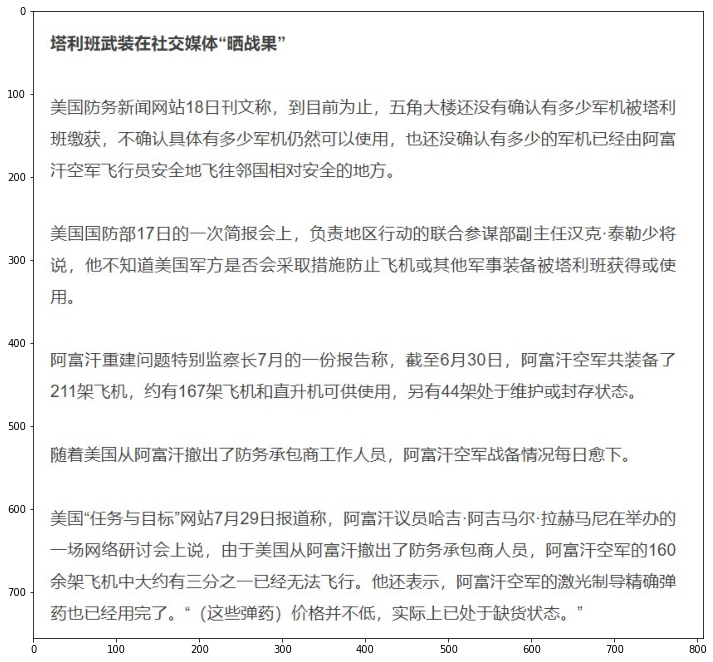

In [15]:
plt.figure(figsize=(12,12))
img=plt.imread(img_path)
plt.imshow(img)

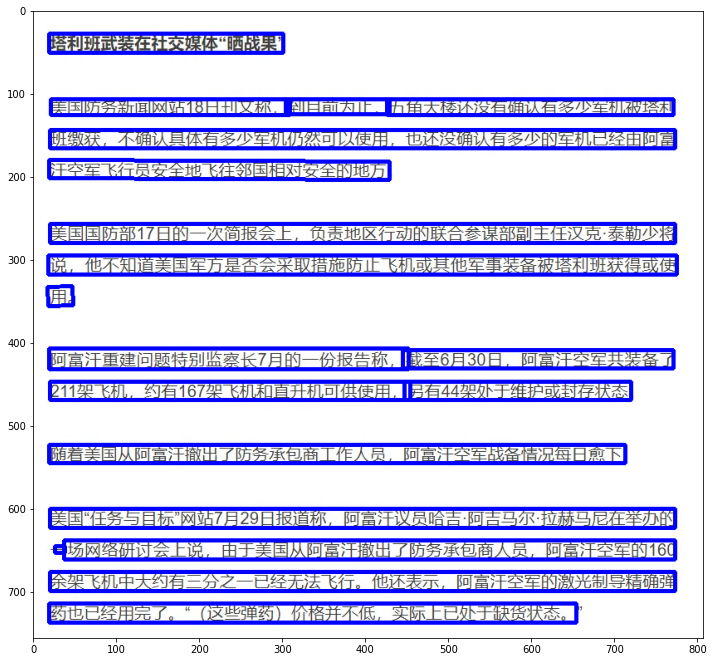

In [28]:
plt.figure(figsize=(12,12))
res=plt.imread(img_path)
for pts in PolygonList:
#     print(pts)
    points=np.array([[pt["X"],pt["Y"]] for pt in pts],np.int32)
    points.reshape((-1,1,2))
    res=cv2.polylines(img=res, pts=[points], isClosed=True, color=(0,0,255), thickness=3)
plt.imshow(res)